# Assignment Activity 1: Make predictions with regression

1) Launch Jupyter Notebook and create a new Python3 file.

2) Import the Python libraries and packages that you’ll need to perform linear regression. 

3) Load the turtle_reviews.csv file, which you can download from Assignment: Predicting future outcomes and explore the data. 
    
    #Create a new DataFrame (e.g. reviews).
    
    #Sense-check the DataFrame by printing the DataFrame, data types and metadata.

    #Determine if there are any missing values in the DataFrame.
    
    #Create a summary of the descriptive statistics.

In [1]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')  

In [2]:
# Import the data set.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [4]:
# View the DataFrame.
print(reviews.head())
print(reviews.info())
reviews.describe()

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


# The DataFrame consists of 2000 rows and 11 columns.
# The metadata indicates that both columns have 2000 non-null values. 
# which means there is no missing data. 
# The descriptive statistics also confirm the max, min, and count values. 

4) Remove redundant columns (language and platform).

In [5]:
# Remove redundant columns.
reviews.drop(['language', 'platform'], axis='columns', inplace=True)
reviews.drop

<bound method DataFrame.drop of       gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     ed

5) Change column headings to names that are easier to reference (e.g. renumeration and spending_score).

In [6]:
# Rename the columns headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)':'spending_score'})

#view columns names.
reviews

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


6) Save a copy of the clean DataFrame as a CSV file and import the file to sense-check (e.g. shape, metadata).


In [7]:
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [8]:
# Load the CSV file (house_price.csv).
reviews = pd.read_csv('turtle_reviews_clean.csv')  

# Print the DataFrame.
reviews.head()


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [9]:
# View the DataFrame.
print(reviews.head())
print(reviews.info())
reviews.describe()

   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


7) Use linear regression or multiple linear regression and the statsmodels functions to evaluate possible linear relationships between loyalty points and age/remuneration/spending scores to determine whether these can be used to predict the loyalty points.

    a.Specify the independent and dependent variables.
    
    b.Create the OLS model.
    
    c.Extract the estimated parameters,
    standard errors,and  predicted values.
    
    d.Generate the regression table based 
    on the X coefficient and constant values.
   
    e. Plot the linear regression and add a regression line.

In [10]:
# Define the dependent variable.
y = reviews['age']  

# Define the independent variable.
X = reviews[['remuneration', 'product']] 

# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [11]:
# Call the predictions for X (array).
mlr.predict(X) 

array([39.5603069 , 39.560605  , 39.55221435, ..., 39.22725589,
       39.20298662, 39.21443746])

In [12]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  5.824792128927836e-05
Intercept:  39.6028583516846
Coefficients:


[('remuneration', -0.0043039999929897835), ('product', 2.2931010114947682e-05)]

In [13]:
# Make predictions.
New_Value1 = 5.75
New_Value2 = 15.2
print ('Predicted Value: \n', mlr.predict([[New_Value1 ,New_Value2]]))  

Predicted Value: 
 [39.5784589]


In [14]:
# Load the CSV file (house_price.csv).
reviews = pd.read_csv('turtle_reviews_clean.csv')  

# Print the DataFrame.
reviews.head() 

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [15]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [16]:
# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train, y_train)

# Predict is used for predicting on the x_test.
y_pred = lr.predict(x_test)

# View the output.
y_pred

array([39.41637733, 39.6872069 , 39.74775468, 39.52333793, 39.74350938,
       39.59858466, 39.7514923 , 39.34190268, 39.5716191 , 39.63193533,
       39.47743046, 39.51199612, 39.55595784, 39.79356367, 39.8178492 ,
       39.71386057, 39.7730899 , 39.59113407, 39.31621484, 39.29835398,
       39.45653197, 39.40870806, 39.68975562, 39.62376041, 39.60273939,
       39.55560814, 39.90666988, 39.75931693, 40.02258011, 39.33698085,
       39.3406232 , 39.77523057, 39.77075459, 39.52979162, 39.62072512,
       39.46356457, 39.46273357, 39.44994872, 39.61989441, 39.47005021,
       39.67005187, 39.52295863, 39.46397993, 39.79385122, 40.05880982,
       39.33512802, 39.77098527, 39.53749314, 39.68302989, 39.46241406,
       39.84816721, 39.39551078, 39.63692808, 39.26713989, 39.5317406 ,
       39.50235588, 39.34963029, 39.75573321, 39.93916198, 39.89494817,
       39.49516118, 39.42256868, 39.38598722, 39.54062428, 39.79997955,
       39.53178484, 39.95564751, 39.88251888, 39.52848166, 39.49

In [17]:
# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train, y_train)

# Predict is used for predicting on the x_test.
y_pred = lr.predict(x_test)

# View the output.
y_pred

array([39.41637733, 39.6872069 , 39.74775468, 39.52333793, 39.74350938,
       39.59858466, 39.7514923 , 39.34190268, 39.5716191 , 39.63193533,
       39.47743046, 39.51199612, 39.55595784, 39.79356367, 39.8178492 ,
       39.71386057, 39.7730899 , 39.59113407, 39.31621484, 39.29835398,
       39.45653197, 39.40870806, 39.68975562, 39.62376041, 39.60273939,
       39.55560814, 39.90666988, 39.75931693, 40.02258011, 39.33698085,
       39.3406232 , 39.77523057, 39.77075459, 39.52979162, 39.62072512,
       39.46356457, 39.46273357, 39.44994872, 39.61989441, 39.47005021,
       39.67005187, 39.52295863, 39.46397993, 39.79385122, 40.05880982,
       39.33512802, 39.77098527, 39.53749314, 39.68302989, 39.46241406,
       39.84816721, 39.39551078, 39.63692808, 39.26713989, 39.5317406 ,
       39.50235588, 39.34963029, 39.75573321, 39.93916198, 39.89494817,
       39.49516118, 39.42256868, 39.38598722, 39.54062428, 39.79997955,
       39.53178484, 39.95564751, 39.88251888, 39.52848166, 39.49

In [18]:
# Print the R-squared, intercept and coefficient value.
print("R-squared value: ", lr.score(x_test, y_test))

print("Intercept value: ", lr.intercept_)
print("Coefficient value: ", lr.coef_)

R-squared value:  -0.0020031367923718513
Intercept value:  39.10927877166406
Coefficient value:  [6.70143628e-03 3.19504099e-05]


## Assignment Activity 2: Make predictions with clustering

1) Launch the Jupyter Notebook you completed for Assignment activity 1: Make predictions with regression.

2) Import the necessary libraries and prepare the data for clustering. 
    
    a.Import the CSV file you prepared in Module 1.
    
    b.Create a new DataFrame (e.g. df2) containing the remuneration and spending_score columns.
    
    c.Explore the new DataFrame.

In [19]:
# Import libraries.
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Load the data.
df = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [20]:
df2 = df[['remuneration', 'spending_score']]

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [22]:
print(df2.columns)

Index(['remuneration', 'spending_score'], dtype='object')


In [23]:
df2.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


3) Plot the remuneration versus spending score to determine any correlations and possible groups (clusters). (Hint: You can use a scatterplot and pairplot.)

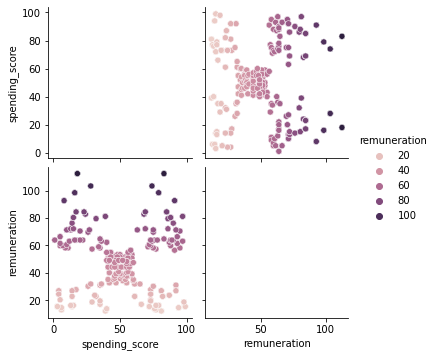

In [24]:
# Create a pairplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns
x = df2[['spending_score', 'remuneration']]

sns.pairplot(df2,
             vars=x,
             hue='remuneration',
             diag_kind='spending_score')

------We have five colored clusters, but there is some overlap with the two clusters on remuneration.

------The first step in k-means clustering is to select random centroids.

4) Use the Silhouette and Elbow methods to determine the optimal number of clusters for k-means clustering.

    a.Plot both methods and explain how you determine the number of clusters to use.
    
    b.Add titles and legends to the plot.

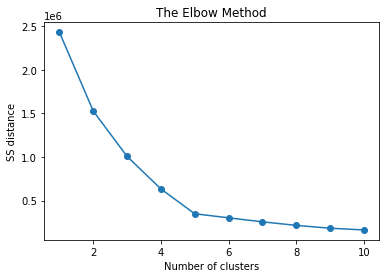

In [25]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=100,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

5) Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhouette methods.

    a.Plot the predicted k-means.

    b.Explain which value might give you the best clustering.

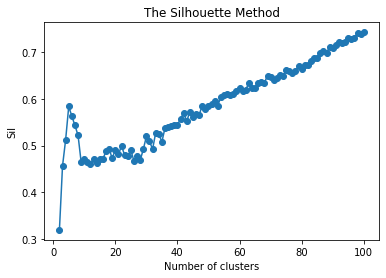

In [26]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 100

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

The silhouette method is better for clustering in this exemple. Best clustering as we can see going up to 0.6, down again and moving the numbers of clustering up at 0.5.

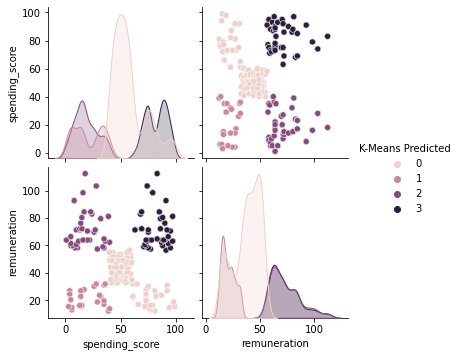

In [27]:
# Use three clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

---We’ll need 4 random centroidsto find new centroids of the clusters.

6) Fit a final model using your selected value for k.

    a.Justify your selection and comment on the 
    respective cluster sizes of your final solution.

    b.Check the number of observations per predicted 
    class.

In [28]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

Check the number of observations per predicted class: 
Spending-score there's 4 variations and plots give it 3 k-mens.
Income and spending score there's 3 variations in plot and two just in Income. 

In [29]:
# View the K-Means predicted.
print(x.head())

   spending_score  remuneration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  0
2               6         13.12                  1
3              77         13.12                  0
4              40         13.94                  1


<AxesSubplot:xlabel='spending_score', ylabel='remuneration'>

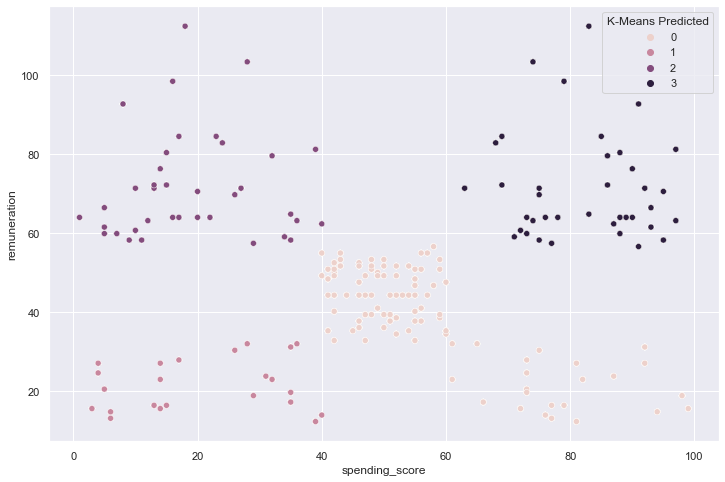

In [30]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y ='remuneration',
                data=x,
                hue='K-Means Predicted',
                )


Sumary: 
 
 To begin, we first selected a number of groups to use and randomly initialize their respetive center points. 
   Base on classified points, we recompute the group center by taking the mean of all the vectors in the group. 
In this instance, the results between k-means and hierarchical clustering were pretty similar. This is not always the case. In general, the advantage of agglomerative hierarchical clustering is that it tends to produce more accurate results. The downside is that hierarchical clustering is more difficult to implement and more time/resource consuming than k-means.
In this analyse, we can see that the clusters are more concentrate into the center. 

## Assignement Activity 3: Analyse customer sentiments with reviews

In [31]:
!pip install wordcloud
!pip install stopwords

In [32]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Import the data set.
survey_data = pd.read_csv('reviews')

# View the data.
survey_data.shape

(2000, 12)

In [33]:
df3 = df[['review', 'summary']]
df3 = df.loc[:, ['review','summary']]

In [34]:
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [35]:
res = df.append(df3)
res

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18.0,12.30,39.0,210.0,graduate,453.0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23.0,12.30,81.0,524.0,graduate,466.0,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22.0,13.12,6.0,40.0,graduate,254.0,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25.0,13.12,77.0,562.0,graduate,263.0,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33.0,13.94,40.0,366.0,graduate,291.0,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great game. Did not think I would like it whe...,Super fun
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great game for all.........\nKeeps the mind ni...,Great Game
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fun game!,Four Stars


In [36]:
# Sense-check the DataFrame.
print(df3.columns)

Index(['review', 'summary'], dtype='object')


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [38]:
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [39]:
# Change the data to lower case a
df3['review'].apply(lambda x: x.lower())


0       when it comes to a dm's screen, the space on t...
1       an open letter to galeforce9*:\n\nyour unpaint...
2       nice art, nice printing.  why two panels are f...
3       amazing buy! bought it as a gift for our new d...
4       as my review of gf9's previous screens these w...
                              ...                        
1995    the perfect word game for mixed ages (with mom...
1996    great game.  did not think i would like it whe...
1997    great game for all.........\nkeeps the mind ni...
1998                                            fun game!
1999    this game is fun. a lot like scrabble without ...
Name: review, Length: 2000, dtype: object

In [40]:
# Replace ponctuation
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    When it comes to a DMs screen the space on the...
1    An Open Letter to GaleForce9\n\nYour unpainted...
2    Nice art nice printing  Why two panels are fil...
3    Amazing buy Bought it as a gift for our new dm...
4    As my review of GF9s previous screens these we...
Name: review, dtype: object

In [41]:
df3['summary'].apply(lambda x: x.lower())

0       the fact that 50% of this space is wasted on a...
1       another worthless dungeon master's screen from...
2                         pretty, but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995       the perfect word game for mixed ages (with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

In [42]:
# Replace ponctuation
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    The fact that 50 of this space is wasted on ar...
1    Another worthless Dungeon Masters screen from ...
2                       pretty but also pretty useless
3                                           Five Stars
4                                           Money trap
Name: summary, dtype: object

In [43]:
res = df.append(df3)
res

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18.0,12.30,39.0,210.0,graduate,453.0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23.0,12.30,81.0,524.0,graduate,466.0,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22.0,13.12,6.0,40.0,graduate,254.0,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25.0,13.12,77.0,562.0,graduate,263.0,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33.0,13.94,40.0,366.0,graduate,291.0,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The perfect word game for mixed ages with Mom ...,The perfect word game for mixed ages with Mom
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great game Did not think I would like it when...,Super fun
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great game for all\nKeeps the mind nimble,Great Game
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fun game,Four Stars


In [44]:
# Drop duplicates in both columns.
df3.duplicated().sum()

29

In [45]:
df3

,review,summary
0,When it comes to a DMs screen the space on the...,The fact that 50 of this space is wasted on ar...
1,An Open Letter to GaleForce9\n\nYour unpainted...,Another worthless Dungeon Masters screen from ...
2,Nice art nice printing Why two panels are fil...,pretty but also pretty useless
3,Amazing buy Bought it as a gift for our new dm...,Five Stars
4,As my review of GF9s previous screens these we...,Money trap
...,...,...
1995,The perfect word game for mixed ages with Mom ...,The perfect word game for mixed ages with Mom
1996,Great game Did not think I would like it when...,Super fun
1997,Great game for all\nKeeps the mind nimble,Great Game
1998,fun game,Four Stars


In [46]:
# Tokenise and create word clouds for the respective columns (separately).
# Create a copy of the DataFrame.
df3 = df.loc[:, ['review','summary']]
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [47]:
# Create a copy of the DataFrame.
df3 = df.copy(deep=True)
print(df3)

      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

In [48]:
!pip install WordCloud

In [49]:
# Import the necessary libraries and packages + nltk  
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

# Create a variable to store the stopwords. 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\44794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\44794\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [50]:
# Define tokenize function
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens
# Apply tokenization function to text column
df['tokens'] = df['summary'].apply(tokenize_text)
print(df)

      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

In [53]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 

In [54]:
pip install wordcloud
pip install stopwords

SyntaxError: invalid syntax (834984236.py, line 1)

In [55]:
# Download necessary ressources
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\44794\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
text = "most commum words"

In [57]:
tokens = nltk.word_tokenize(text)

In [58]:
from nltk.corpus import stopwords

# Load English stopwords
stopwords = stopwords.words('english')

# Remove stopwords from the text data
text_data = 'your text data'
cleaned_text = ' '.join([word for word in text_data.split() if word.lower() not in stopwords])

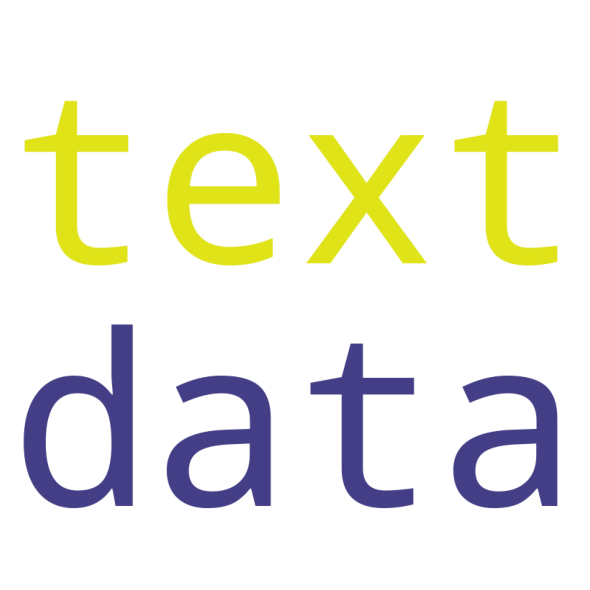

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [60]:
# Determine values of output.
df3 = df['summary'].values

# View results.
df3

array(['The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...',
       "Another worthless Dungeon Master's screen from GaleForce9",
       'pretty, but also pretty useless', ..., 'Great Game', 'Four Stars',
       'Love this game'], dtype=object)

In [61]:
# Determine values of output.
df1 = df['review'].values

# View results.
df1

array(["When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.",
       'An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I\'m still waiting for a single screen that isn\'t polluted with pointless artwork where useful, reference-able tables should be. Once again, you\'ve created a single use screen that is only useful when running the "Storm King\'s Thunder" adventure. Even despite the fact that it\'s geared to that adventure path, it\'s usefulness negligible, at best. I massive swath of the inner pa

In [62]:
# Import the necessary libraries and packages + nltk  
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

# Create a variable to store the stopwords. 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\44794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\44794\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [63]:
# Determine the frequency distribution and polarity
for i in range(15):
    print(i)
    print(df3[i])

0
The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...
1
Another worthless Dungeon Master's screen from GaleForce9
2
pretty, but also pretty useless
3
Five Stars
4
Money trap
5
Five Stars
6
Best gm screen ever
7
Five Stars
8
Great but could be even better
9
Another missed opportunity.  Not a value add to the product line.
10
Five Stars
11
Love the map!
12
Not a general DM screen
13
Very weak game
14
Fell completely flat...


In [64]:
# Plot histograms of polarity (use 15 bins) for both columns.
from textblob import TextBlob

# Compute polarity of a text string
text = 'love'
polarity = TextBlob(text).sentiment.polarity

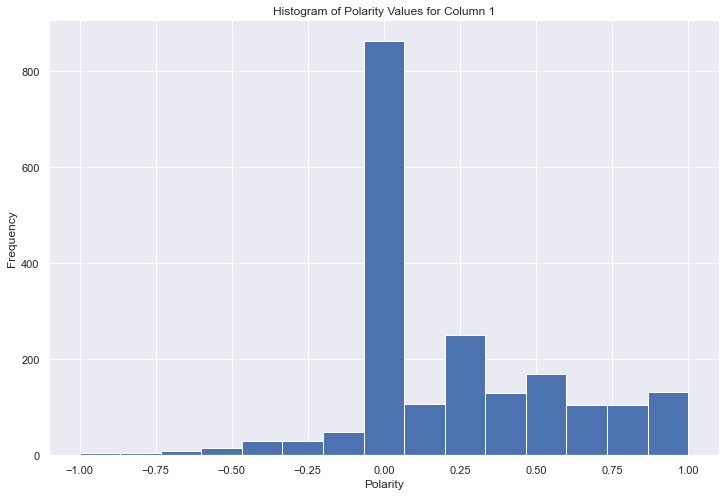

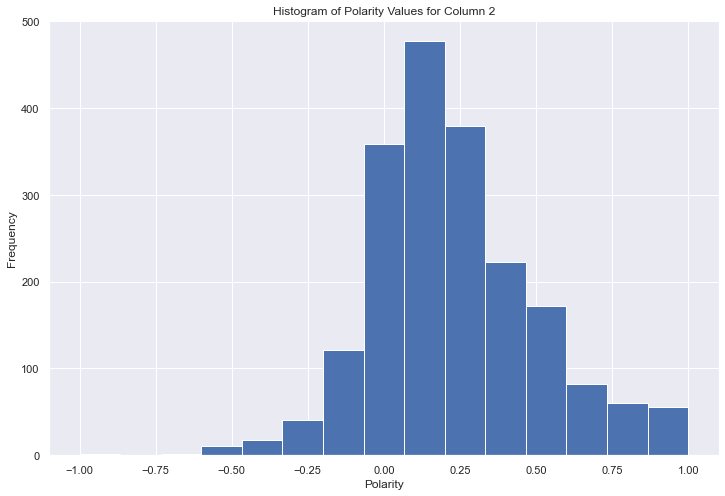

In [65]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('turtle_reviews.csv')

# Compute polarity for column 1
polarity_values_1 = []
for text in data['summary']:
    polarity = TextBlob(text).sentiment.polarity
    polarity_values_1.append(polarity)

# Create histogram for column 1
plt.hist(polarity_values_1, bins=15)
plt.title('Histogram of Polarity Values for Column 1')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Compute polarity for column 2
polarity_values_2 = []
for text in data['review']:
    polarity = TextBlob(text).sentiment.polarity
    polarity_values_2.append(polarity)

# Create histogram for column 2
plt.hist(polarity_values_2, bins=15)
plt.title('Histogram of Polarity Values for Column 2')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


In [87]:
# Review the sentiment scores for the respective columns
import pandas as pd
from textblob import TextBlob

# create sample DataFrame
df = pd.DataFrame({'text': ['I love', 'This is terrible', 'Great game']})

# define a function to calculate sentiment score using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# apply the function to the 'text' column and create a new column with sentiment scores
df['sentiment_score'] = df['text'].apply(get_sentiment)

# view the DataFrame with sentiment scores
print(df)


               text  sentiment_score
0            I love              0.5
1  This is terrible             -1.0
2        Great game              0.2


In [88]:

# Print the top 20 positive reviews and summaries for both columns
top_positives = df[df['sentiment_score'] > 0].sort_values(by='sentiment_score', ascending=False).head(20)
print('Top 20 Positive Reviews and Summaries:')


# Print the top 20 negative reviews and summaries for both columns
top_negatives = df[df['sentiment_score'] < 0].sort_values(by='sentiment_score').head(20)
print('Top 20 Negative Reviews and Summaries:')

print(top_positives)
print(top_positives[['text', 'sentiment_score']])

Top 20 Positive Reviews and Summaries:
Top 20 Negative Reviews and Summaries:
         text  sentiment_score
0      I love              0.5
2  Great game              0.2
         text  sentiment_score
0      I love              0.5
2  Great game              0.2


## The analysis is showing neutral sentiments and more likely positive. 
